# Содержание работы

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [38]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


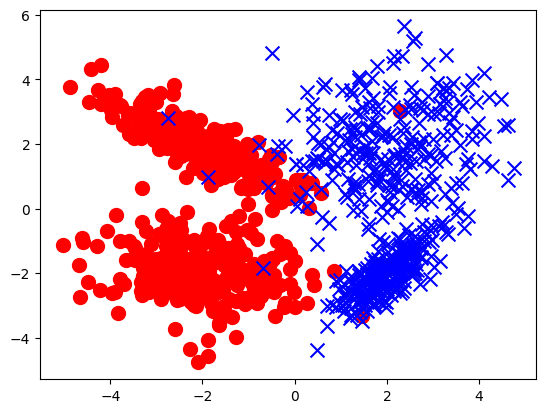

In [39]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

In [40]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000): # Начальные параметры
        self.b = None 
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, b, b_grad): # Шаг градиентного спуска
        return b - self._alpha * b_grad
    
    def optimize(self, X, y, start_b, n_iters): # Оптимизация методом градиентного спуска
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    
    def fit(self, X, y): # Обучение 
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)
    

In [41]:
class LogReg(SGD):
    def sigmoid(self, X, b): # Функция активации
        return 1. / (1. + np.exp(-X.dot(b)))
    
    def grad_func(self, X, y, b): # Функция градиентного спуска
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y) # Производная от LogLoss
        return grad
    
    def predict_proba(self, X): # Возвращает вероятность принадлежности к первому классу
        return self.sigmoid(X, self.b)
    
    def predict(self, X): # Преобразует вероятности в 0 и 1
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [42]:
logreg = LogReg() 
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [43]:
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

y.shape
X.shape

accuracy = 0.98 F1-score = 0.98


(1000, 3)

In [44]:
y_pred_proba = logreg.predict_proba(X)

In [45]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

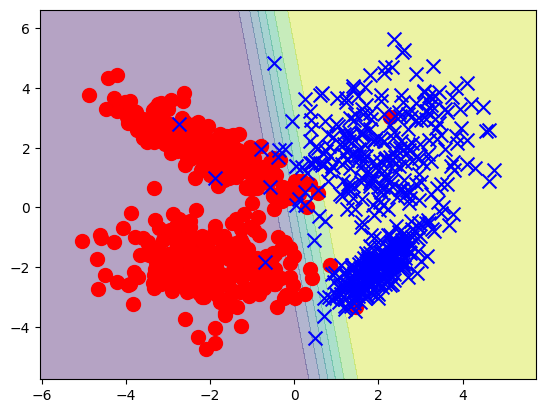

In [46]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

# Задания для самостоятельного выполнения

### 1. Выведите результаты работы библиотечной модели - в численном и в графическом виде.

In [47]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

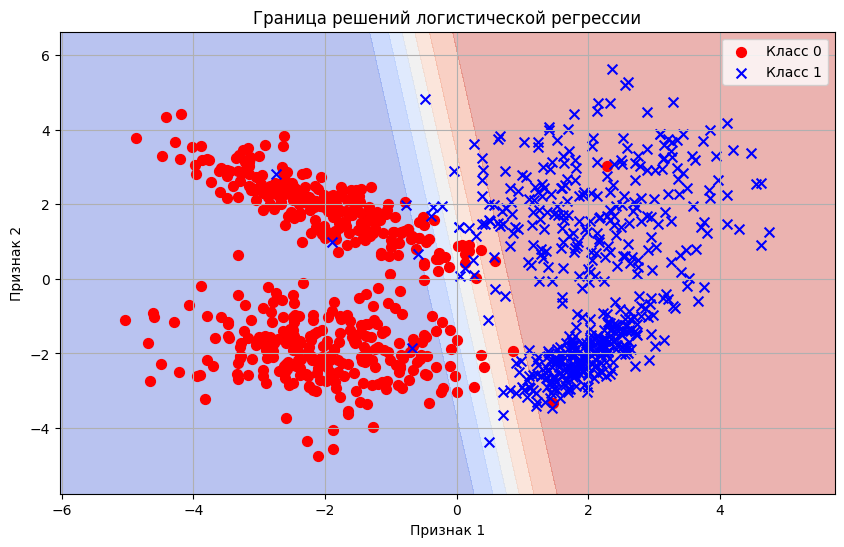

accuracy = 0.98 F1-score = 0.98


In [48]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(fit_intercept=True)
model.fit(X, y)
y_pred = model.predict(X)

xx, yy = np.meshgrid(
    np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
    np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01)
)

XX = np.c_[xx.ravel(), yy.ravel()]  
Z = model.predict_proba(XX)[:, 1] 
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker="o", c='r', s=50, label='Класс 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker="x", c='b', s=50, label='Класс 1')
plt.legend()
plt.title("Граница решений логистической регрессии")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.grid(True)
plt.show()

from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

In [49]:
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


Библиотечная логистическая регрессия показывает такие же значения что и самописная

### 2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

Ошибка начала расти при alpha = 9.32603, log loss: 0.0767


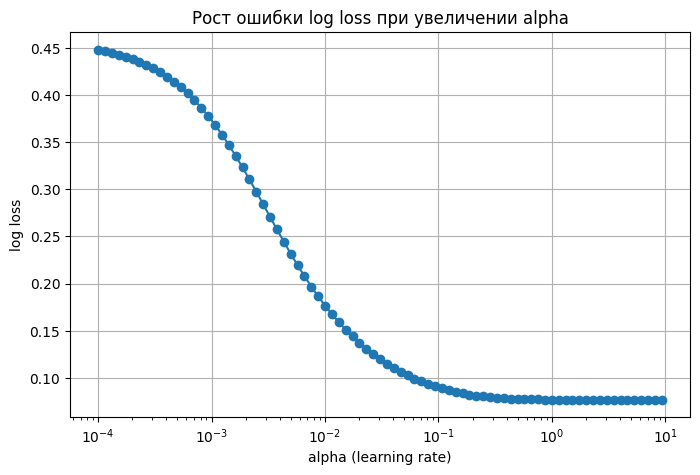

In [50]:
from sklearn.metrics import log_loss
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

alphas = np.logspace(-4, 2, 100)  # от 0.0001 до 100
errors = []
last_alpha = None

prev_error = None
for alpha in alphas:
    try:
        logreg = make_pipeline(StandardScaler(), LogReg(alpha=alpha))
        logreg.fit(X, y)
        y_proba = logreg.predict_proba(X)
        error = log_loss(y, y_proba)
        errors.append(error)

        if prev_error is not None and error > prev_error:
            last_alpha = alpha
            break  # нашли момент начала роста ошибки

        prev_error = error
    except Exception as e:
        print(f"Ошибка на alpha={alpha:.5f}: {e}")
        errors.append(np.nan)
        break

if last_alpha is not None:
    print(f"Ошибка начала расти при alpha = {last_alpha:.5f}, log loss: {error:.4f}")
else:
    print("Ошибка не начала расти в данном диапазоне alpha.")

# Визуализация
plt.figure(figsize=(8, 5))
plt.plot(alphas[:len(errors)], errors, marker='o')
plt.xscale("log")
plt.xlabel("alpha (learning rate)")
plt.ylabel("log loss")
plt.title("Рост ошибки log loss при увеличении alpha")
plt.grid(True)
plt.show()


### 3. Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

In [51]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000): # Начальные параметры
        self.b = None 
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, b, b_grad): # Шаг градиентного спуска
        return b - self._alpha * b_grad
    
    def optimize(self, X, y, start_b, n_iters): # Оптимизация методом градиентного спуска
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    
    def fit(self, X, y): # Обучение
        X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)
    
class LogReg(SGD):
    def sigmoid(self, X, b): # Функция активации
        return 1. / (1. + np.exp(-X.dot(b)))
    
    def grad_func(self, X, y, b): # Функция градиентного спуска
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y) # Производная от LogLoss
        return grad
    
    def predict_proba(self, X): # Возвращает вероятность принадлежности к первому классу
        X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        return self.sigmoid(X, self.b)
    
    def predict(self, X): # Преобразует вероятности в 0 и 1
        y_pred = self.predict_proba(X) > 0.5
        return y_pred    

In [52]:
logreg = LogReg() 
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [53]:
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

y.shape
X.shape

accuracy = 0.98 F1-score = 0.98


(1000, 2)

# 4. Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

In [54]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=1,
                          random_state=1)

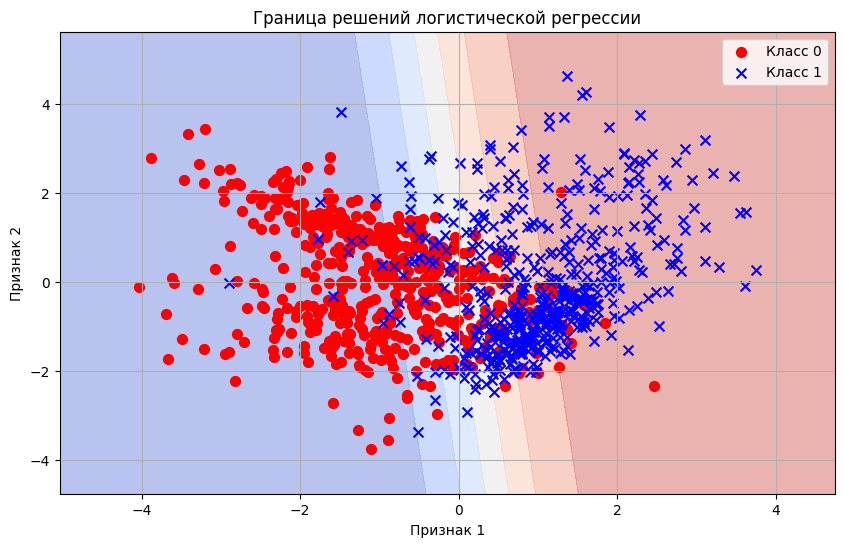

accuracy = 0.85 F1-score = 0.86


In [55]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(fit_intercept=True)
model.fit(X, y)
y_pred = model.predict(X)

xx, yy = np.meshgrid(
    np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
    np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01)
)

XX = np.c_[xx.ravel(), yy.ravel()]  
Z = model.predict_proba(XX)[:, 1] 
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker="o", c='r', s=50, label='Класс 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker="x", c='b', s=50, label='Класс 1')
plt.legend()
plt.title("Граница решений логистической регрессии")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.grid(True)
plt.show()

from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

In [56]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=5,
                          random_state=1)

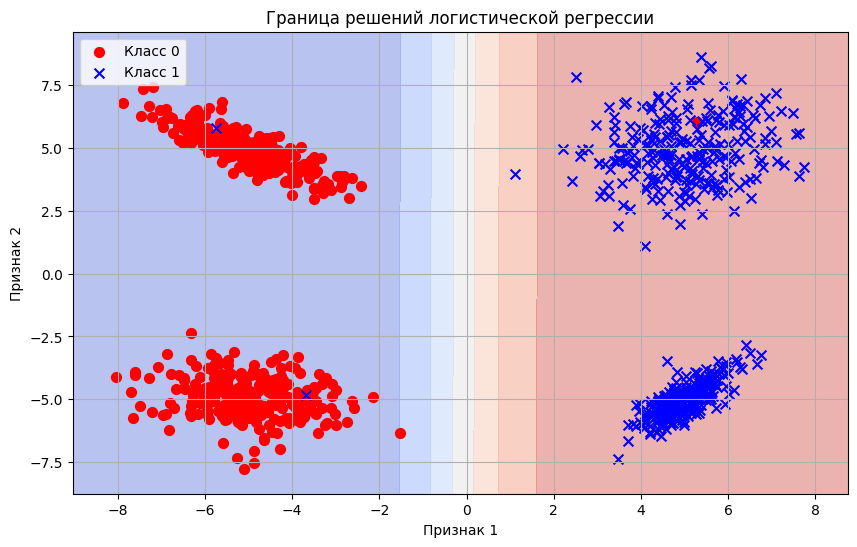

accuracy = 1.00 F1-score = 1.00


In [57]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(fit_intercept=True)
model.fit(X, y)
y_pred = model.predict(X)

xx, yy = np.meshgrid(
    np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
    np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01)
)

XX = np.c_[xx.ravel(), yy.ravel()]  
Z = model.predict_proba(XX)[:, 1] 
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker="o", c='r', s=50, label='Класс 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker="x", c='b', s=50, label='Класс 1')
plt.legend()
plt.title("Граница решений логистической регрессии")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.grid(True)
plt.show()

from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

Чем меньше class_sep тем сильнее пересекаются между собой классы, чем он больше тем на большем расстоянии классы находятся друг от друга. Чем дальше друг от друга классы, тем их проще разделить, следовательно модель работает точнее

# 5. Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

In [58]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=10,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [59]:
logreg = LogReg() 
logreg.fit(X, y)
y_pred = logreg.predict(X)

from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


### 6. Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn

In [60]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=5,
                          n_informative=3,
                          n_redundant=2,
                          n_classes=3,
                          n_clusters_per_class=2,
                          class_sep=5,
                          random_state=1)

In [61]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000): # Начальные параметры
        self.b = None 
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, b, b_grad): # Шаг градиентного спуска
        return b - self._alpha * b_grad
    
    def optimize(self, X, y, start_b, n_iters): # Оптимизация методом градиентного спуска
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    
    def fit(self, X, y): # Обучение
        X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)
    
class LogReg(SGD):
    def sigmoid(self, X, b): # Функция активации
        return 1. / (1. + np.exp(-X.dot(b)))
    
    def grad_func(self, X, y, b): # Функция градиентного спуска
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y) # Производная от LogLoss
        return grad
    
    def predict_proba(self, X): # Возвращает вероятность принадлежности к первому классу
        X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        return self.sigmoid(X, self.b)
    
    def predict(self, X): # Преобразует вероятности в 0 и 1
        y_pred = self.predict_proba(X) > 0.5
        return y_pred    
    
    def fit_ova(self, X, y):
        self.classes_ = np.unique(y)
        self.classifiers_ = []

        for c in self.classes_:
            # Создаём бинарные метки: 1 — если класс == c, иначе 0
            y_bin = (y == c).astype(int)
            
            # Создаём и обучаем копию логрегрессии
            clf = LogReg(alpha=self._alpha, n_iters=self._n_iters)
            clf.fit(X, y_bin)
            self.classifiers_.append(clf)
    
    def predict_ova(self, X):
        X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

        probs = np.array([
            clf.sigmoid(X, clf.b) for clf in self.classifiers_
        ])
        preds = np.argmax(probs, axis=0)
        return self.classes_[preds]


In [62]:
model_ova = LogReg()
model_ova.fit_ova(X, y)
y_pred = model_ova.predict_ova(X)


from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average='weighted')
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.99 F1-score = 0.99


In [63]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(multi_class='ovr')
model.fit(X, y)

y_pred = model.predict(X)

ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average='weighted')
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')


accuracy = 0.99 F1-score = 0.99


### 7. Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression

In [64]:
probs = model.predict_proba(X)

np.set_printoptions(precision=4, suppress=True) 

print("Все вероятности для всех объектов:")
print(probs)

Все вероятности для всех объектов:
[[0.9999 0.     0.0001]
 [0.9965 0.0035 0.    ]
 [0.9981 0.     0.0019]
 ...
 [0.     0.9896 0.0104]
 [0.     0.9913 0.0087]
 [0.0001 0.9999 0.    ]]


# Контрольные вопросы

1. **Задача классификации** заключается в предсказании категории (класса) объекта на основе его признаков. Примеры:
   - Предсказание, будет ли email спамом или нет.
   - Классификация изображений на категории (например, "кот", "собака", "птица").
   - Диагностика заболеваний (например, "болен", "здоров").

2. **Шаг градиентного спуска** — это один шаг обновления параметров модели, при котором параметры изменяются в направлении, противоположном градиенту функции потерь, чтобы минимизировать ошибку модели.

3. **Функция ошибки в модели логистической регрессии** — это **логарифмическая потеря** или **LogLoss** (logarithmic loss), которая измеряет расхождение между предсказанными вероятностями и истинными метками.

4. **Столбец из единиц в матрице признаков** добавляется для учета свободного параметра (сдвига), то есть для того, чтобы модель могла учитывать смещение в данных (величину, которая не зависит от признаков, например, порог для принятия решения).


# Дополнительные задания:

### 1. На основе классов, написанных в этой работе, создайте класс, реализующий модель линейной регрессии, но уже в новой архитектуре. В базовом классе реализуйте мезанизм адаптивной скорости обучения, нормализации входных данных, остановки при стабилизации функции ошибки.

In [65]:
from sklearn.preprocessing import StandardScaler

class SGD:
    def __init__(self, alpha=0.5, n_iters=1000, tol=1e-4):
        self._alpha = alpha
        self._n_iters = n_iters
        self._tol = tol
        self.scaler = StandardScaler()
        self.b = None

    def normalize(self, X):
        return self.scaler.fit_transform(X)

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad

    def compute_loss(self, X, y, b):
        preds = X.dot(b)
        return np.mean((preds - y) ** 2) / 2

    def optimize(self, X, y, start_b):
        b = start_b.copy()
        prev_loss = self.compute_loss(X, y, b)
        for i in range(self._n_iters):
            grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, grad)
            loss = self.compute_loss(X, y, b)
            if loss > prev_loss:
                self._alpha /= 2
            if abs(prev_loss - loss) < self._tol:
                print(f"Early stopping at iteration {i}")
                break
            prev_loss = loss
        return b

    def fit(self, X, y):
        X = self.normalize(X)
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        start_b = np.ones(X.shape[1])
        self.b = self.optimize(X, y, start_b)


class LinReg(SGD):
    def grad_func(self, X, y, b):
        n = X.shape[0]
        return X.T.dot(X.dot(b) - y) / n

    def predict(self, X):
        X = self.scaler.transform(X)
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return X.dot(self.b)
    
class LogReg(SGD):
    def sigmoid(self, X, b): # Функция активации
        return 1. / (1. + np.exp(-X.dot(b)))
    
    def grad_func(self, X, y, b): # Функция градиентного спуска
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y) # Производная от LogLoss
        return grad
    
    def predict_proba(self, X): # Возвращает вероятность принадлежности к первому классу
        X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        return self.sigmoid(X, self.b)
    
    def predict(self, X): # Преобразует вероятности в 0 и 1
        y_pred = self.predict_proba(X) > 0.5
        return y_pred    
    
    def fit_ova(self, X, y):
        self.classes_ = np.unique(y)
        self.classifiers_ = []

        for c in self.classes_:
            # Создаём бинарные метки: 1 — если класс == c, иначе 0
            y_bin = (y == c).astype(int)
            
            # Создаём и обучаем копию логрегрессии
            clf = LogReg(alpha=self._alpha, n_iters=self._n_iters)
            clf.fit(X, y_bin)
            self.classifiers_.append(clf)
    
    def predict_ova(self, X):
        X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

        probs = np.array([
            clf.sigmoid(X, clf.b) for clf in self.classifiers_
        ])
        preds = np.argmax(probs, axis=0)
        return self.classes_[preds]

In [66]:
model_ova = LogReg()
model_ova.fit_ova(X, y)
y_pred = model_ova.predict_ova(X)


from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average='weighted')
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

Early stopping at iteration 12
Early stopping at iteration 14
Early stopping at iteration 17
accuracy = 0.98 F1-score = 0.99


In [67]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Генерируем синтетические данные
X, y = make_regression(n_samples=200, n_features=3, noise=10, random_state=42)

# Разбиваем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinReg(alpha=0.1, n_iters=1000, tol=1e-5)
model.fit(X_train, y_train)

from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test)

print("R² score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

Early stopping at iteration 91
R² score: 0.9850379508121101
MSE: 132.61318585149033


### 2. Постройте ROC кривую и найдите площадь под этой кривой, используя функции roc_curve, roc_auc_score из библиотеки sklearn.metrics. Оцените качество модели по этой кривой

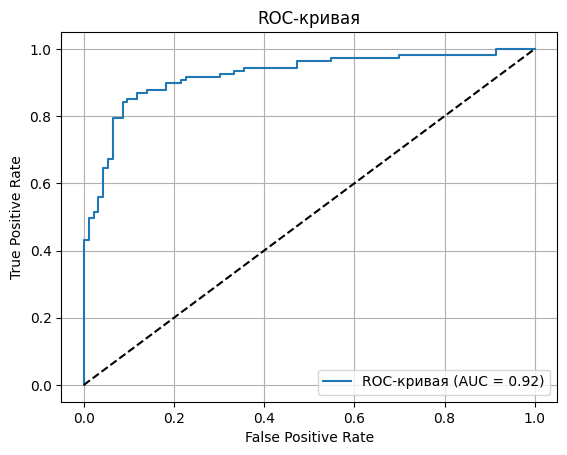

In [68]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Генерация бинарного датасета
X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем логистическую регрессию
model = LogisticRegression()
model.fit(X_train, y_train)

# Получаем вероятности принадлежности к классу 1
y_proba = model.predict_proba(X_test)[:, 1]

# Строим ROC кривую
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Визуализация
plt.figure()
plt.plot(fpr, tpr, label=f"ROC-кривая (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # случайный классификатор
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.legend(loc="lower right")
plt.grid()
plt.show()